<a href="https://colab.research.google.com/github/Gauravhulmukh/Machine_Learning_algorithms_from_scratch/blob/master/Logistic%20Regression/Binomial_Logistic_Regression_using_Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
def compute_log_likelihood(y,est_prob):
  logit = ((y*est_prob) + ((1-y)*(1-est_prob)))
  return np.prod(np.where(logit != 0, logit, 1))

In [0]:
def net_input(beta, x):
    # compute the weighted sum of inputs
    return x.dot(beta)

In [0]:
def log_odds_to_prob(x): 
    # Conversion from log(odds) to probability
    return np.divide(np.exp(x), (1 + np.exp(x)))

In [0]:
def compute_probabilities(beta,x):
  return log_odds_to_prob(net_input(beta,x))

In [0]:
def logistic(x_unbiased, y, learningrate, dif):
    # Bias variable 
    bias_variable = np.ones(len(x_unbiased))
    # Plug input along with bias_variable
    x = np.column_stack([bias_variable, x_unbiased])
    # Initialize parameterss/coefficients
    beta = np.array([0] * x.shape[1])
    # Container to store log likelihoods and derivatives
    log_likelihoods = []
    derivatives = []
    diff = 10000 # Any high value
    while (diff > dif):
        est_probs = compute_probabilities(beta, x) # Predict with new value of beta
        W_matrix = np.diag((est_probs) * (1-est_probs)) # A sparse diagonal matrix
        # Assume x_new to have dimensions (n x f), whereas y, pi to have dimensions (n x 1)
        # solve(t(x_new)%*%W : factor in pi with x_new (x_new.T * (identity_matrix * (pi[i]*(1-pi[i]))) : outputs (f x n)
        # (solve(t(x_new)%*%W%*%as.matrix(x_new))): factor in each feature of our computed matrix(x_new factored with estimated probability) with each feature of orginal input matrix : outputs (f x f)
        # (t(x_new)%*%(y - pi)) : Factor in error with each of the feature column with respect to each example : outputs (f x 1)
        derivative = np.dot(np.linalg.inv(np.dot(np.dot(x.T, W_matrix), x)), np.dot(x.T, (y - est_probs))) # This computation is equivalent to computing derivative w.r.t to each feature, more about (residuals x feature level transformation)
        beta = beta + derivative # We add, because we are doing gradient ascent(to maximize the likelihood)
        diff = np.sum(derivative.flatten()**2)
        log_likelihood = compute_log_likelihood(y, est_probs)
        # Append Log likelihood and derivative into the respective container
        log_likelihoods.append(log_likelihood)
        derivatives.append(derivative)
    return beta, log_likelihoods, derivatives

In [0]:
x = np.arange(1, 11)
y = np.array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [13]:
x.shape, y.shape

((10,), (10,))

In [0]:
beta, log_likelihoods, derivatives = logistic(x, y, 0.01, 0.000000001)

In [15]:
log_likelihoods[-1]

0.013431911499350552

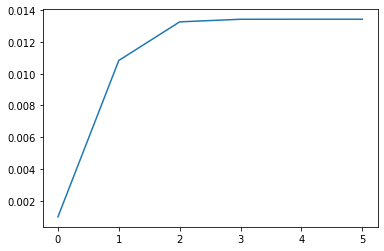

In [16]:
plt.plot(log_likelihoods)